In [15]:
import nltk
import string,re
from nltk.corpus import inaugural

In [16]:
nltk.download('inaugural')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\malpo\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


True

In [17]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [18]:
inaugural.fileids()
FDR=inaugural.raw('1941-Roosevelt.txt')
JFK=inaugural.raw('1961-Kennedy.txt')
RNX=inaugural.raw('1973-Nixon.txt')

#### 2.1)  Number of characters, words and sentences


In [20]:
inaugural.fileids()
# Number of characters
FDR_char = inaugural.raw('1941-Roosevelt.txt')
JFK_char = inaugural.raw('1961-Kennedy.txt')
RNX_char = inaugural.raw('1973-Nixon.txt')
print('Number of Characters in Speech of President Franklin D. Roosevelt in 1941 are', len(FDR_char))
print('Number of Characters in Speech of President John F. Kennedy in 1961 are', len(JFK_char))
print('Number of Characters in Speech of President Richard Nixon in 1973 are', len(RNX_char))

Number of Characters in Speech of President Franklin D. Roosevelt in 1941 are 7571
Number of Characters in Speech of President John F. Kennedy in 1961 are 7618
Number of Characters in Speech of President Richard Nixon in 1973 are 9991


In [21]:
# Number Of words
FDR_words = inaugural.words('1941-Roosevelt.txt')
JFK_words = inaugural.words('1961-Kennedy.txt')
RNX_words = inaugural.words('1973-Nixon.txt')
print('Number of words in Speech of President Franklin D. Roosevelt in 1941 are',len(FDR_words))
print('Number of words in Speech of President John F. Kennedy in 1961 are', len(JFK_words))
print('Number of words in Speech of President Richard Nixon in 1973 are', len(RNX_words))

Number of words in Speech of President Franklin D. Roosevelt in 1941 are 1536
Number of words in Speech of President John F. Kennedy in 1961 are 1546
Number of words in Speech of President Richard Nixon in 1973 are 2028


In [22]:
# Number of sentences
FDR_sen = inaugural.sents('1941-Roosevelt.txt')
JFK_sen = inaugural.sents('1961-Kennedy.txt')
RNX_sen = inaugural.sents('1973-Nixon.txt')
print('Number of Sentences in Speech of President Franklin D. Roosevelt in 1941 are', len(FDR_sen))
print('Number of Sentences in Speech of President John F. Kennedy in 1961 are', len(JFK_sen))
print('Number of Sentences in Speech of President Richard Nixon in 1973 are', len(RNX_sen))

Number of Sentences in Speech of President Franklin D. Roosevelt in 1941 are 68
Number of Sentences in Speech of President John F. Kennedy in 1961 are 52
Number of Sentences in Speech of President Richard Nixon in 1973 are 69


#### 2.2) Removing all the stopwords from the three speeches.

In [23]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize

stopwords_clean = set(stopwords.words('english')+list(string.punctuation))
def remove_stopwords(array,stopwords_clean):
    filtered = []
    for a in array:
        al = a.lower()
        if al not in stopwords_clean and a!='--':
            filtered.append(al)
    return filtered
FDR_words_clean = remove_stopwords(FDR_words,stopwords_clean)
JFK_words_clean = remove_stopwords(JFK_words,stopwords_clean)
RNX_words_clean = remove_stopwords(RNX_words,stopwords_clean)
print('Number of words in Speech of President Franklin D. Roosevelt in 1941-before removal of stopwords are', len(FDR_words))
print('Number of words in Speech of President Franklin D. Roosevelt in 1941-after removal of stopwords are', len(FDR_words_clean))
print('Number of words in Speech of President John F. Kennedy in 1961-before removal of stoPwords are', len(JFK_words))
print('Number of words in Speech of President John F. Kennedy in 1961-after removal of stopwords are', len(FDR_words_clean))
print('Number of words in Speech of President Richard Nixon in 1973-before removal of are',len(RNX_words))
print('Number of words in Speech of President Richard Nixon in 1973-after removal of stopwords are', len(FDR_words_clean))

Number of words in Speech of President Franklin D. Roosevelt in 1941-before removal of stopwords are 1536
Number of words in Speech of President Franklin D. Roosevelt in 1941-after removal of stopwords are 632
Number of words in Speech of President John F. Kennedy in 1961-before removal of stoPwords are 1546
Number of words in Speech of President John F. Kennedy in 1961-after removal of stopwords are 632
Number of words in Speech of President Richard Nixon in 1973-before removal of are 2028
Number of words in Speech of President Richard Nixon in 1973-after removal of stopwords are 632


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\malpo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
# sample sentence after the removal of stopwords.
example_sent = """On each national day of inauguration since 1789, the people have renewed their sense of dedication to the united states."""
stopwords_clean = set(stopwords.words('english')+list(string.punctuation))
word_tokens = word_tokenize(example_sent)
filtered_sentence = [w for w in word_tokens if not w.lower() in stopwords_clean]
filtered_sentence = []
for w in word_tokens:
    if w not in stopwords_clean:
        filtered_sentence.append(w)
#Print Original sample sentence with stopwords.
print("Original example sentence", word_tokens)
#Print Filtered sentence after the removal of stopwords.
print("Filtered sentence", filtered_sentence)

Original example sentence ['On', 'each', 'national', 'day', 'of', 'inauguration', 'since', '1789', ',', 'the', 'people', 'have', 'renewed', 'their', 'sense', 'of', 'dedication', 'to', 'the', 'united', 'states', '.']
Filtered sentence ['On', 'national', 'day', 'inauguration', 'since', '1789', 'people', 'renewed', 'sense', 'dedication', 'united', 'states']


### 2.4) The word cloud of each of the three speeches. (after removing the stopwords).

In [11]:
# Word Cloud 
from wordcloud import WordCloud
def word_cloud(w):
    wordcloud = WordCloud(width = 800, height = 800,background_color ='black',min_font_size = 10).generate(w)
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

Word Cloud for President Franklin D. Roosevelt speech in 1941


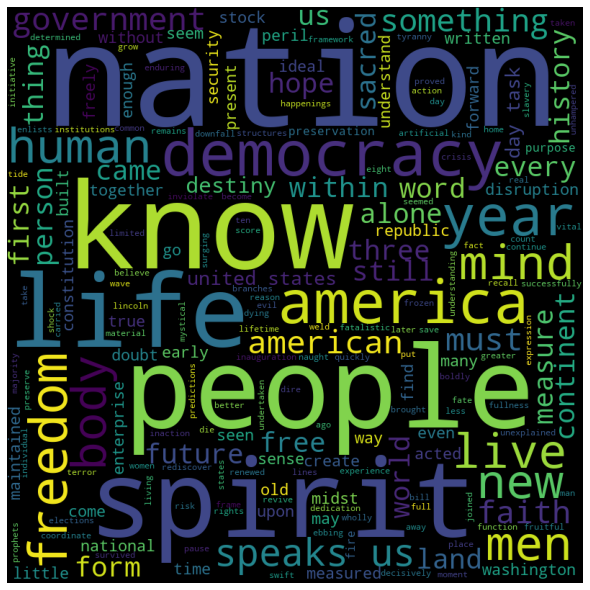

In [12]:
# Word Cloud for President Franklin D. Roosevelt speech in 1941
print('Word Cloud for President Franklin D. Roosevelt speech in 1941')
word_cloud((" ").join(FDR_words_clean))

Word Cloud for President John F. Kennedy speech in 1961


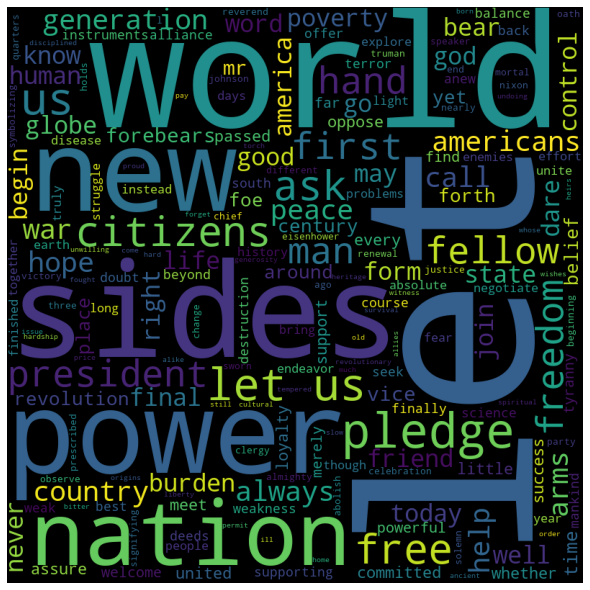

In [13]:
# Word Cloud for President John F. Kennedy speech in 1961
print('Word Cloud for President John F. Kennedy speech in 1961')
word_cloud((" ").join(JFK_words_clean))

Word Cloud for President Richard Nixon speech in 1973


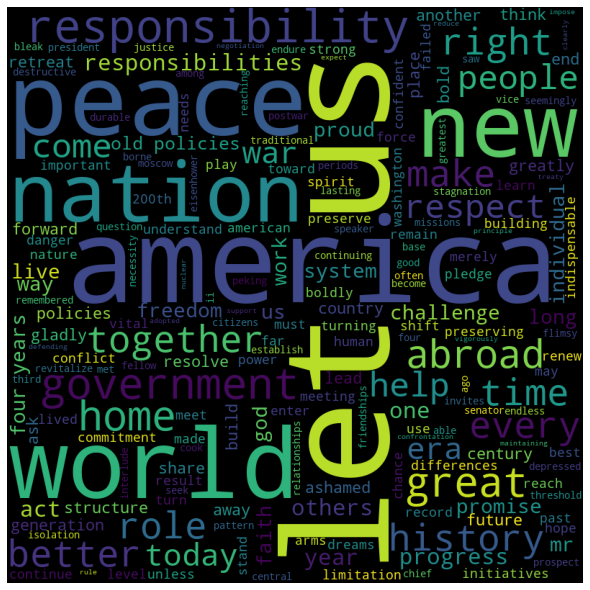

In [14]:
# Word Cloud for President Richard Nixon speech in 1973
print('Word Cloud for President Richard Nixon speech in 1973')
word_cloud((" ").join(RNX_words_clean))